In [2]:
import pandas as pd
stocks_data = pd.read_csv('stocks.csv')
stocks_data

Ticker        Date        Open        High         Low       Close  \
0     AAPL  07-02-2023  150.639999  155.229996  150.639999  154.649994   
1     AAPL  08-02-2023  153.880005  154.580002  151.169998  151.919998   
2     AAPL  09-02-2023  153.779999  154.330002  150.419998  150.869995   
3     AAPL  10-02-2023  149.460007  151.339996  149.220001  151.009995   
4     AAPL  13-02-2023  150.949997  154.259995  150.919998  153.850006   
..     ...         ...         ...         ...         ...         ...   
243   GOOG  01-05-2023  107.720001  108.680000  107.500000  107.709999   
244   GOOG  02-05-2023  107.660004  107.730003  104.500000  105.980003   
245   GOOG  03-05-2023  106.220001  108.129997  105.620003  106.120003   
246   GOOG  04-05-2023  106.160004  106.300003  104.699997  105.209999   
247   GOOG  05-05-2023  105.320000  106.440002  104.738998  106.214996   

      Adj Close    Volume  
0    154.414230  83322600  
1    151.688400  64120100  
2    150.639999  56007100  
3    151.009995  57450700  
4    153.850006  62199000  
..          ...       ...  
243  107.709999  20926300  
244  105.980003  20343100  
245  106.120003  17116300  
246  105.209999  19780600  
247  106.214996  20705300  

[248 rows x 8 columns]

In [3]:
stocks_data.Ticker.value_counts()

Ticker
AAPL    62
MSFT    62
NFLX    62
GOOG    62
Name: count, dtype: int64

In [4]:
descriptive_stats = stocks_data.groupby('Ticker')
descriptive_stats['Close'].describe()

count        mean        std         min         25%         50%  \
Ticker                                                                     
AAPL     62.0  158.240645   7.360485  145.309998  152.077499  158.055000   
GOOG     62.0  100.631532   6.279464   89.349998   94.702501  102.759998   
MSFT     62.0  275.039839  17.676231  246.270004  258.742500  275.810013   
NFLX     62.0  327.614677  18.554419  292.760010  315.672493  325.600006   

               75%         max  
Ticker                          
AAPL    165.162506  173.570007  
GOOG    105.962503  109.459999  
MSFT    287.217506  310.649994  
NFLX    338.899994  366.829987

In [5]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Assuming stocks_data is your DataFrame containing the stock data
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'], format='%d-%m-%Y')
pivot_data = stocks_data.pivot(index='Date', columns='Ticker', values='Close')
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=pivot_data.index, y=pivot_data['AAPL'], name='AAPL'))
fig.add_trace(go.Scatter(x=pivot_data.index, y=pivot_data['GOOG'], name='GOOG'))
fig.add_trace(go.Scatter(x=pivot_data.index, y=pivot_data['NFLX'], name='NFLX'))
fig.add_trace(go.Scatter(x=pivot_data.index, y=pivot_data['MSFT'], name='MSFT'))

fig.update_layout(
    title_text="Time Series of Closing Prices",
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)

fig.show()

In [6]:
volatility = pivot_data.std()
fig = px.bar(
    volatility,
    x=volatility.index,
    y=volatility.values,
    labels={
        'y':'Standard Deviation',
        'x':'Ticker'
    },
    title='Volatility of Closing Prices (Standard Deviation)'
    )
fig.show()

In [7]:
 pivot_data

Ticker            AAPL        GOOG        MSFT        NFLX
Date                                                      
2023-02-07  154.649994  108.040001  267.559998  362.950012
2023-02-08  151.919998  100.000000  266.730011  366.829987
2023-02-09  150.869995   95.459999  263.619995  362.500000
2023-02-10  151.009995   94.860001  263.100006  347.359985
2023-02-13  153.850006   95.000000  271.320007  358.570007
...                ...         ...         ...         ...
2023-05-01  169.589996  107.709999  305.559998  324.119995
2023-05-02  168.539993  105.980003  305.410004  317.549988
2023-05-03  167.449997  106.120003  304.399994  319.299988
2023-05-04  165.789993  105.209999  305.410004  320.779999
2023-05-05  173.570007  106.214996  310.649994  322.760010

[62 rows x 4 columns]

In [8]:
import plotly.express as px

correlation_matrix = pivot_data.corr()

fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='blues',
                labels=dict(x="Ticker", y="Ticker", color="Correlation"),
                title='Correlation Matrix of Closing Prices')

fig.show()

linear regression

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



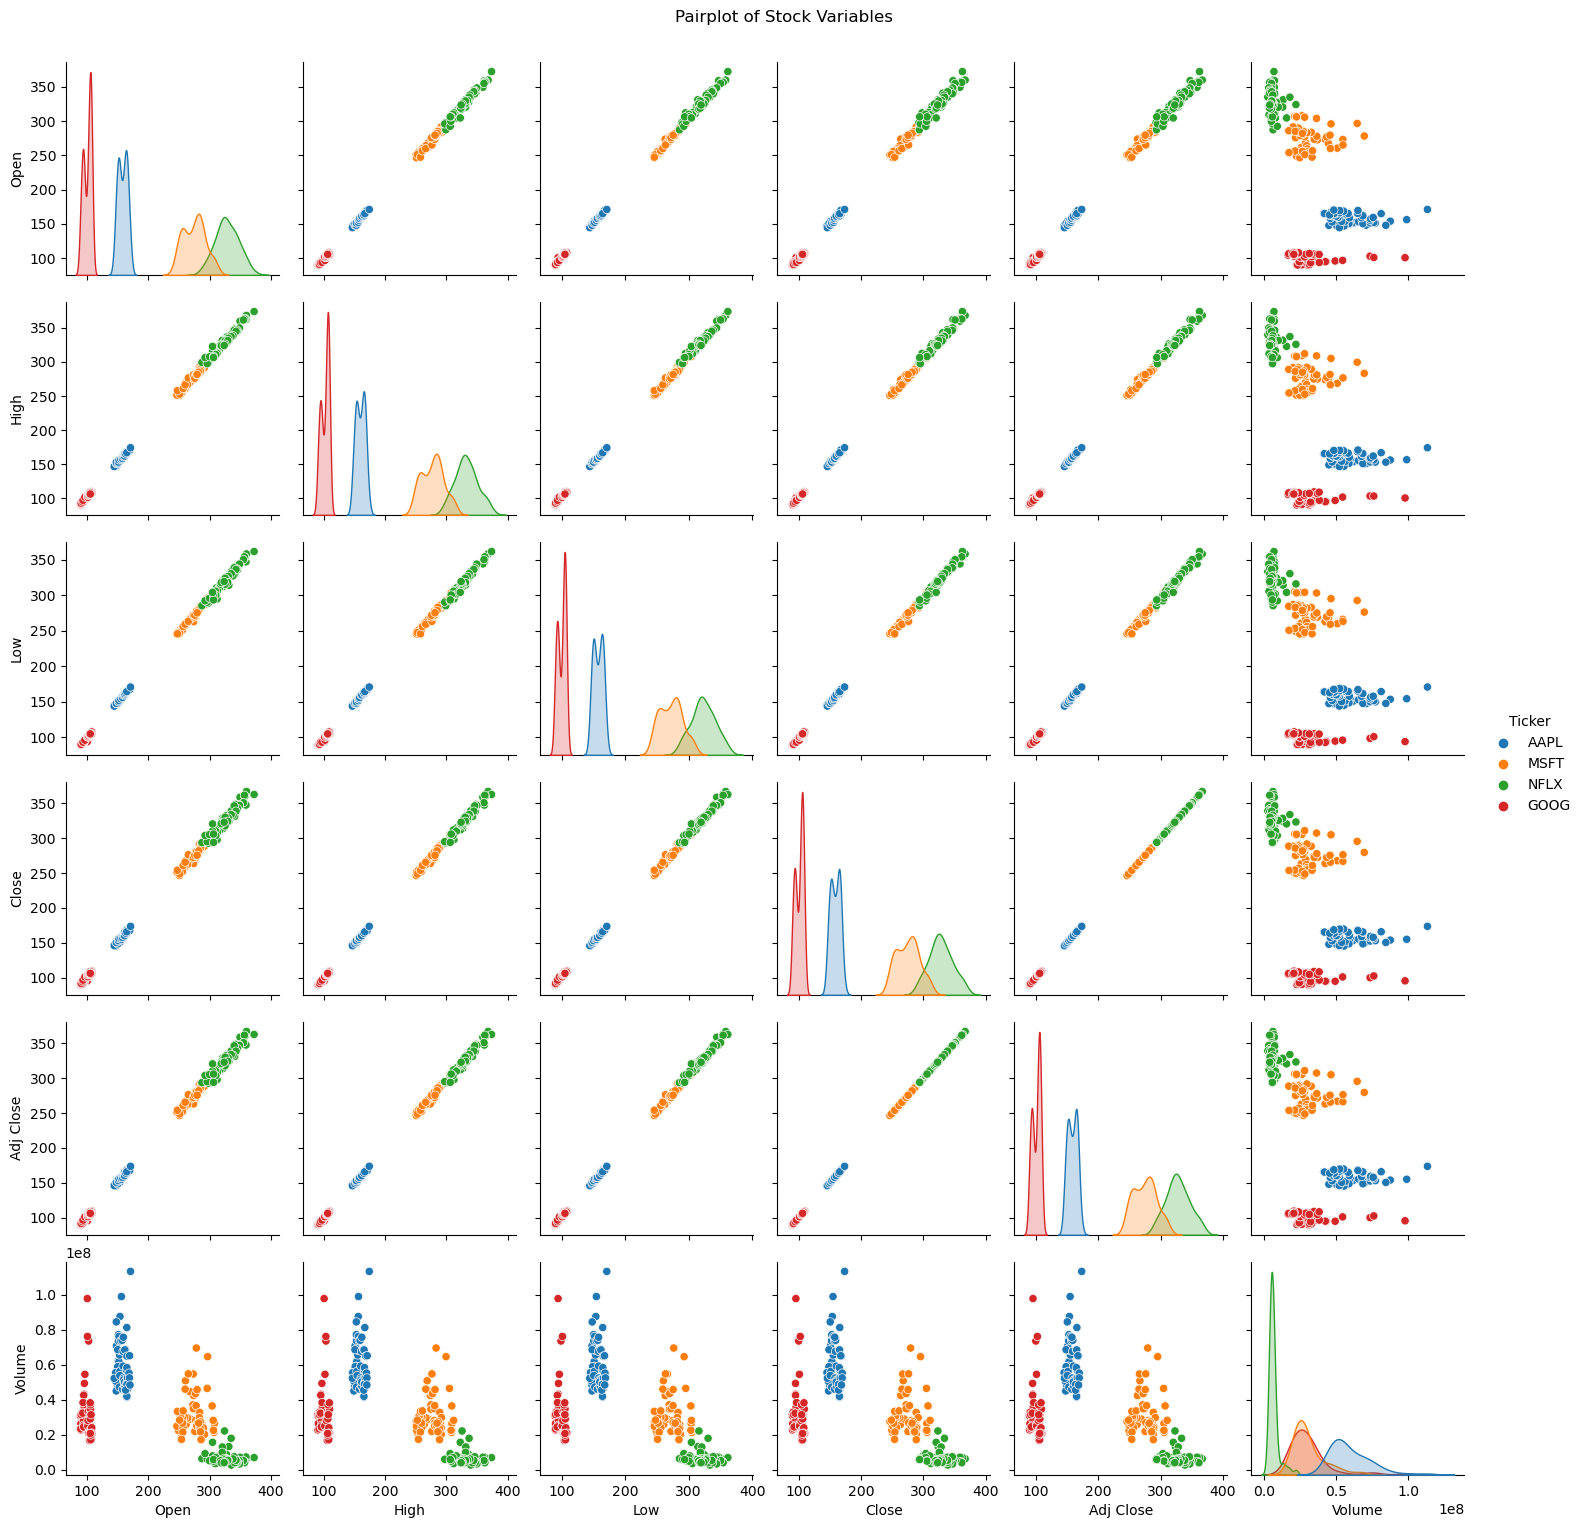

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'stocks_data' is your DataFrame containing the stock data
# Extracting data for the first four stocks (rows 2 to 249, equally divided into 4 stocks)
stocks_data_subset = stocks_data.iloc[2:250].reset_index(drop=True)

# Create pairplot
sns.pairplot(stocks_data_subset, vars=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], hue='Ticker')
plt.suptitle('Pairplot of Stock Variables', y=1.02)
plt.show()

PCA ANALYSIS

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'stocks_data' is your DataFrame containing the stock data
# Extracting data for the first four stocks (rows 2 to 249, equally divided into 4 stocks)
stocks_data_subset = stocks_data.iloc[2:250].reset_index(drop=True)



In [13]:
# Selecting numeric columns for PCA
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data_for_pca = stocks_data_subset[numeric_cols]



In [14]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)



In [15]:
# Apply PCA
pca = PCA(n_components=2)  # You can choose the number of components you want to retain
principal_components = pca.fit_transform(scaled_data)



In [16]:
# Creating a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])



In [17]:
# Adding Ticker information back to the principal components DataFrame
pc_df['Ticker'] = stocks_data_subset['Ticker']



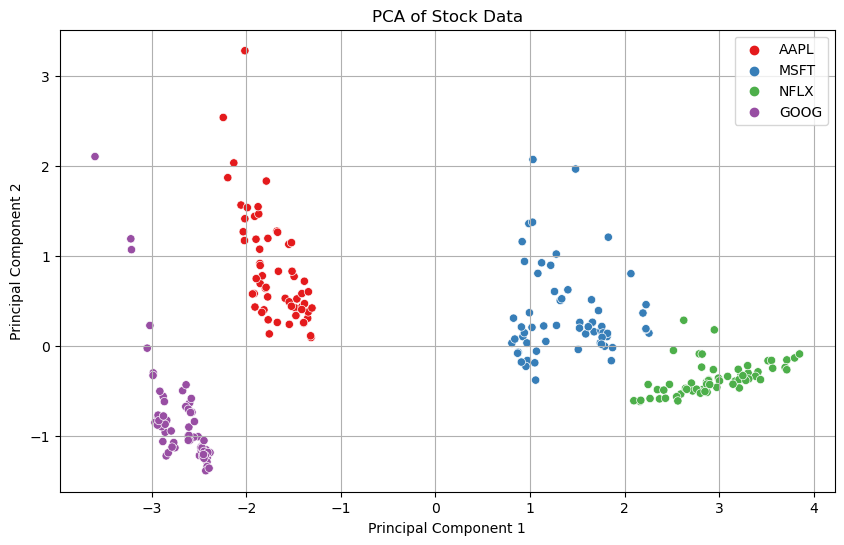

In [18]:
# Plotting the principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Ticker', data=pc_df, palette='Set1')
plt.title('PCA of Stock Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Decsion tree

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming 'stocks_data' is your DataFrame containing the stock data
# Selecting features (X) and target variable (y)
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
X = stocks_data[features]
y = stocks_data['Ticker']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
